In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools 
from sklearn.preprocessing import StandardScaler

In [4]:
creditcard = pd.read_csv ("/content/creditcard.csv")
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
creditcard.isnull().values.any()

False

In [6]:
creditcard["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
non_fraud = len(creditcard.Class == 0)
fraud = len(creditcard[creditcard.Class == 1])
fraud_precentage = (fraud/(fraud + non_fraud))*100

print("Genuine Transactions: ",non_fraud)
print("Fraud Transactions: ", fraud)
print("Percentage of Fraud Transactions: {:.4f}".format(fraud_precentage))

Genuine Transactions:  284807
Fraud Transactions:  492
Percentage of Fraud Transactions: 0.1725


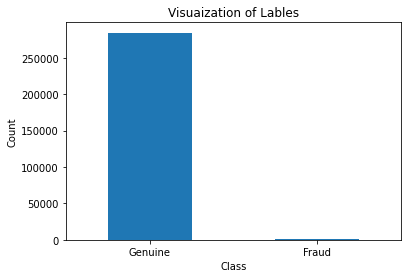

In [8]:
lables = ["Genuine","Fraud"]
count_classes = creditcard.value_counts(creditcard['Class'],sort = True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visuaization of Lables")
plt.ylabel("Count")
plt.xticks(range(2),lables)
plt.show()

In [9]:
scaler = StandardScaler()
creditcard["NormalizeAmount"] = scaler.fit_transform(creditcard["Amount"].values.reshape(-1,1))
creditcard.drop(["Amount","Time"], inplace = True, axis = 1)
Y = creditcard["Class"]
X = creditcard.drop(["Class"], axis = 1)

In [10]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


In [11]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100)

In [12]:
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y)*100

print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.95903701883127


In [13]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrices(actuals, predictions, **kwargs):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [14]:
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(test_Y, predictions_rf))
conf_mat = confusion_matrix(y_true=test_Y, y_pred=predictions_rf)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.79      0.86       136

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85301     6]
 [   29   107]]


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

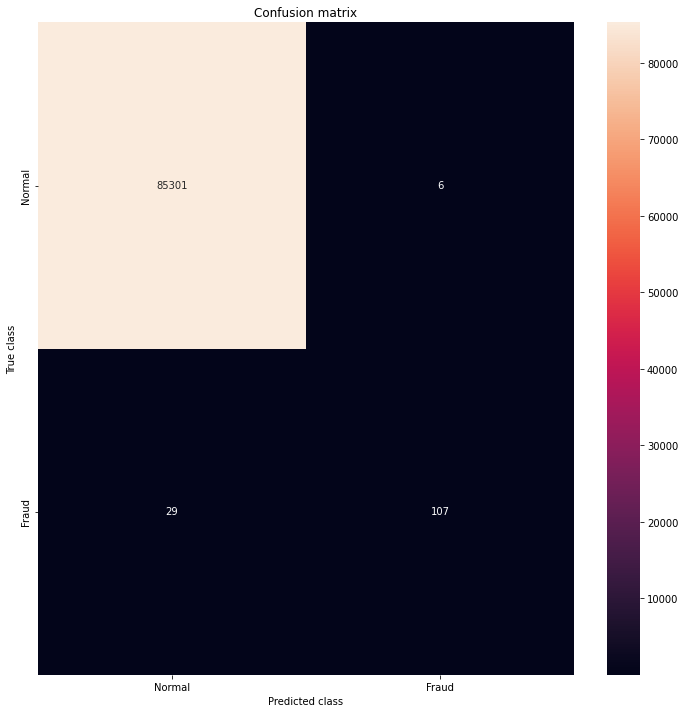

In [16]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(test_Y, predictions_rf) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 